In [1]:
import functools
import numpy as np

from complex_network.networks import network_factory
from complex_network.networks.network_spec import NetworkSpec
from complex_network.networks import pole_calculator

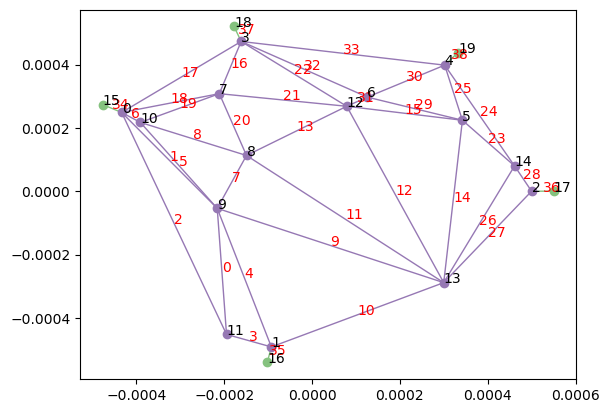

In [2]:
# Generate the random network
np.random.seed(1)
spec = NetworkSpec(
    network_type="delaunay",
    network_shape="circular",
    num_seed_nodes=0,
    external_offset=0.0,
    num_internal_nodes=15,
    num_external_nodes=5,
    network_size=500e-6,
    external_size=550e-6,
    node_S_mat_type="COE",
    node_S_mat_params={},
)
network = network_factory.generate_network(spec)
network.draw(show_indices=True)
link_index = 9

In [3]:
# Check that refractive index derivative is working properly
n = network.get_link(link_index).n
dn = network.get_link(link_index).dn

dk0 = 0.1

lam0 = 500e-9
k0 = 2 * np.pi / lam0
k1 = k0 + dk0

n0 = n(k0)
n1 = n(k1)

dndk = (n1 - n0) / dk0
theory = dn(k0)

print(f"Calculated: {dndk}")
print(f"Theory: {theory}")
print(f"Difference: {np.abs(theory - dndk)}")

Calculated: 2.645519359134596e-09
Theory: 2.6455192676105925e-09
Difference: 9.152400354495752e-17


In [4]:
# Calculate the product S^dag S in three different ways
# REAL WAVENUMBER
lam0 = 500e-9
k0 = 2 * np.pi / lam0

# 1) Formula
S_formula = network.get_S_ee(k0)
prod_formula = S_formula.T @ S_formula

# 2) Volume
U_0_unconjugated = network.get_U_0_unconjugated(k0)
prod_volume = np.identity(len(U_0_unconjugated), dtype=np.complex128) - U_0_unconjugated


# Compare
print(f"Formula vs Volume: {np.max(np.abs(prod_formula - prod_volume))}")

(0.2142248757954979-0.06750410882298585j)
(0.3413291621858926-0.6213475820897818j)
(0.18416250484017743+0.4767476162101685j)
(-0.9834194519330854-0.5133596033131682j)
(-3.3879171518877027+3.004500178019633j)
(1.1858304233078325-0.5536104513576916j)
(-0.2675392173464647+0.35558863957108794j)
(-0.7510339569501774+0.2326535695268549j)
(0.09423416875955304-0.06654191754924083j)
(0.180211082008645-0.27890252636187596j)
(-0.577885358349179+0.008850692271621212j)
(0.7552312279265027-0.223622678650123j)
(0.05870425012028228+0.031891582236200755j)
(-1.0406651607113253+1.1138193106745538j)
(0.567277057276666-0.4607186869596145j)
(-1.2820581941655051+0.3117895750216544j)
(0.06683304896003284-0.024606603154596618j)
(-1.0147603671308367+1.394056233704125j)
(0.3348607946013792-0.3232914811065888j)
(-0.01925155937267968-0.012264453512510542j)
(0.7889756275915121-0.46153650103035526j)
(-3.3098072480569747+2.0381430106162215j)
(-0.15562621612502414+0.2273536521307199j)
(-0.31998523299048043+0.155411243

In [19]:
prod_volume

array([[ 9.92000821e-01+0.j        , -1.42478618e-03+0.00119134j,
         2.92121362e-04-0.00015612j, -3.99863964e-03-0.0019708j ,
         7.31040164e-04+0.00100905j],
       [-1.42478618e-03-0.00119134j,  9.94386348e-01+0.j        ,
         4.71717461e-04+0.00043651j, -1.74859991e-03-0.00195226j,
        -1.18910857e-03+0.00010546j],
       [ 2.92121362e-04+0.00015612j,  4.71717461e-04-0.00043651j,
         9.99347786e-01+0.j        ,  3.02925501e-04+0.00011223j,
         3.41391113e-04-0.00022819j],
       [-3.99863964e-03+0.0019708j , -1.74859991e-03+0.00195226j,
         3.02925501e-04-0.00011223j,  9.96119519e-01+0.j        ,
         3.61705118e-04+0.00053475j],
       [ 7.31040164e-04-0.00100905j, -1.18910857e-03-0.00010546j,
         3.41391113e-04+0.00022819j,  3.61705118e-04-0.00053475j,
         9.98118138e-01+0.j        ]])

In [5]:
prod_formula - prod_volume

array([[-3.33066907e-16-1.40859546e-15j, -6.38378239e-16+3.33066907e-16j,
         3.92047506e-16+3.40005801e-16j,  2.08166817e-16-1.05471187e-15j,
         0.00000000e+00-2.60208521e-16j],
       [-1.11022302e-16-5.55111512e-17j, -2.22044605e-16-5.55111512e-16j,
         3.40005801e-16+3.33066907e-16j, -6.93889390e-17+6.52256027e-16j,
        -8.32667268e-16+1.66533454e-16j],
       [-1.97758476e-16-2.42861287e-16j, -3.46944695e-17-1.24900090e-16j,
         0.00000000e+00+1.24900090e-16j, -2.49800181e-16-1.73472348e-16j,
        -2.22044605e-16-2.77555756e-17j],
       [ 1.04083409e-15+2.22044605e-16j, -7.91033905e-16-4.57966998e-16j,
         1.80411242e-16+2.77555756e-17j,  3.33066907e-16+1.94289029e-16j,
         1.66533454e-16+1.66533454e-16j],
       [ 2.22044605e-16+3.78169718e-16j,  2.77555756e-16-4.44089210e-16j,
         0.00000000e+00-1.38777878e-16j,  2.77555756e-17-1.94289029e-16j,
         0.00000000e+00-1.11022302e-16j]])

In [6]:
# Calculate the product S^dag S in three different ways
# COMPLEX WAVENUMBER
lam0 = 500e-9
k0 = 2 * np.pi / lam0 + 1j * np.random.randn()

# 1) Formula
S_formula = network.get_S_ee(k0)
prod_formula = np.conj(S_formula.T) @ S_formula

# 2) Volume
U_0 = network.get_U_0(k0)
prod_volume = np.identity(len(U_0), dtype=np.complex128) - U_0


# Compare
print(f"Formula vs Volume: {np.max(np.abs(prod_formula - prod_volume))}")

Formula vs Volume: 9.68015433429065e-16


In [7]:
# Calculate k0 Wigner Smith operator directly and using volume integrals
# REAL WAVENUMBER
lam0 = 500e-9
k0 = 2 * np.pi / lam0

ws_direct = network.get_wigner_smith(k0)
ws_volume = network.get_wigner_smith_volume(k0)

# Compare
print(f"Difference: {np.max(np.abs(ws_volume - ws_direct))}")
print(f"Smallest value: {np.min(np.abs(ws_direct))}")
print(
    f"Ratio: {np.max(np.abs(ws_volume - ws_direct)) / np.min(np.abs(ws_direct))}"
)

Difference: 2.949747308632821e-17
Smallest value: 0.0005261267328235569
Ratio: 5.6065337961491794e-14


In [8]:
# Calculate k0 Wigner Smith operator directly and using volume integrals
# COMPLEX WAVENUMBER
lam0 = 500e-9
k0 = 2 * np.pi / lam0 + 1j * np.random.randn()

ws_direct = network.get_wigner_smith(k0)
ws_volume = network.get_wigner_smith_volume(k0)

# Compare
print(f"Difference: {np.max(np.abs(ws_volume - ws_direct))}")
print(f"Smallest value: {np.min(np.abs(ws_direct))}")
print(
    f"Ratio: {np.max(np.abs(ws_volume - ws_direct)) / np.min(np.abs(ws_direct))}"
)

Difference: 5.062955289862377e-16
Smallest value: 0.0005251812723845745
Ratio: 9.640395718747042e-13


In [9]:
# Calculate perurbation Wigner Smith operator directly and using volume integrals
# REAL WAVENUMBER
lam0 = 500e-9
k0 = 2 * np.pi / lam0

ws_direct = network.get_wigner_smith(k0, "Dn", perturbed_link_index=link_index)
ws_volume = network.get_wigner_smith_volume(
    k0, "Dn", perturbed_link_index=link_index
)

# Compare
diff = ws_direct - ws_volume

print(f"Difference: {np.max(np.abs(ws_volume - ws_direct))}")
print(f"Smallest value: {np.min(np.abs(ws_direct))}")
print(
    f"Ratio: {np.max(np.abs(ws_volume - ws_direct)) / np.min(np.abs(ws_direct))}"
)

Difference: 1.4079278354379191e-11
Smallest value: 250.8866203625754
Ratio: 5.611809164646625e-14


In [10]:
# Calculate alpha Wigner Smith operator directly and using volume integrals
# COMPLEX WAVENUMBER
lam0 = 500e-9
k0 = 2 * np.pi / lam0 + 1j * np.random.randn()

ws_direct = network.get_wigner_smith(k0, "Dn", perturbed_link_index=link_index)
ws_volume = network.get_wigner_smith_volume(
    k0, "Dn", perturbed_link_index=link_index
)

# Compare
diff = ws_direct - ws_volume

print(f"Difference: {np.max(np.abs(ws_volume - ws_direct))}")
print(f"Smallest value: {np.min(np.abs(ws_direct))}")
print(
    f"Ratio: {np.max(np.abs(ws_volume - ws_direct)) / np.min(np.abs(ws_direct))}"
)

Difference: 1.2728033999849067e-08
Smallest value: 247.21443899993594
Ratio: 5.148580338324156e-11


In [11]:
# Calculate trace of residue of k0 Wigner Smith operator directly and
# using volume integrals at the pole
pole = 12532230.332102112 - 11.136143180724291j

# 1) Direct
res_direct = pole_calculator.get_residue(network.get_wigner_smith, pole)
trace_direct = np.trace(res_direct)

res_volume = pole_calculator.get_residue(network.get_wigner_smith_volume, pole)
trace_volume = np.trace(res_volume)

# Compare
print(f"Difference: {np.max(np.abs(trace_volume - trace_direct))}")
print(f"Smallest value: {np.min(np.abs(trace_direct))}")
print(
    f"Ratio: {np.max(np.abs(trace_volume - trace_direct)) / np.min(np.abs(trace_direct))}"
)

Difference: 1.0774165449231084e-12
Smallest value: 1.0107504852593063
Ratio: 1.0659569900148988e-12


In [12]:
# Calculate Wigner Smith operator directly and using volume integrals
# POLE
k0 = 12532230.332102112 - 11.136143180724291j

# Define functions to calculate residues for
direct = functools.partial(
    network.get_wigner_smith, variable="Dn", perturbed_link_index=link_index
)
volume = functools.partial(
    network.get_wigner_smith_volume,
    variable="Dn",
    perturbed_link_index=link_index,
)

res_direct = pole_calculator.get_residue(direct, pole)
trace_direct = np.trace(res_direct)

res_volume = pole_calculator.get_residue(volume, pole)
trace_volume = np.trace(res_volume)

# Compare
print(f"Difference: {np.max(np.abs(trace_volume - trace_direct))}")
print(f"Smallest value: {np.min(np.abs(trace_direct))}")
print(
    f"Ratio: {np.max(np.abs(trace_volume - trace_direct)) / np.min(np.abs(trace_direct))}"
)

Difference: 9.018084805045823e-08
Smallest value: 78107.49334786863
Ratio: 1.154573577836102e-12


In [13]:
# Compare ratio of traces to ratio of residues with direct method
pole = 12532230.332102112 - 11.136143180724291j

# Matrices
ws_direct_k0 = network.get_wigner_smith(pole)
ws_direct_Dn = network.get_wigner_smith(
    pole, "Dn", perturbed_link_index=link_index
)
trace_direct_k0 = np.trace(ws_direct_k0)
trace_direct_Dn = np.trace(ws_direct_Dn)
ratio_direct = trace_direct_k0 / trace_direct_Dn

# Residues
res_direct_k0 = pole_calculator.get_residue(network.get_wigner_smith, pole)
res_trace_direct_k0 = np.trace(res_direct_k0)

direct = functools.partial(
    network.get_wigner_smith, variable="Dn", perturbed_link_index=link_index
)
res_direct_Dn = pole_calculator.get_residue(direct, pole)
res_trace_direct_Dn = np.trace(res_direct_Dn)
ratio_res_direct = res_trace_direct_k0 / res_trace_direct_Dn

# Compare
print(f"Difference: {np.max(np.abs(ratio_direct - ratio_res_direct))}")
print(f"Smallest value: {np.min(np.abs(ratio_direct))}")
print(
    f"Ratio: {np.max(np.abs(ratio_direct - ratio_res_direct)) / np.min(np.abs(ratio_direct))}"
)

Difference: 5.987658829735442e-12
Smallest value: 1.2940511307409686e-05
Ratio: 4.6270651039166685e-07


In [14]:
# Compare ratio of traces to ratio of residues with volume method
pole = 12532230.332102112 - 11.136143180724291j

# Matrices
ws_volume_k0 = network.get_wigner_smith_volume(pole)
ws_volume_Dn = network.get_wigner_smith_volume(
    pole, "Dn", perturbed_link_index=link_index
)
trace_volume_k0 = np.trace(ws_volume_k0)
trace_volume_Dn = np.trace(ws_volume_Dn)
ratio_volume = trace_volume_k0 / trace_volume_Dn

# Residues
res_volume_k0 = pole_calculator.get_residue(
    network.get_wigner_smith_volume, pole
)
res_trace_volume_k0 = np.trace(res_volume_k0)

volume = functools.partial(
    network.get_wigner_smith_volume,
    variable="Dn",
    perturbed_link_index=link_index,
)
res_volume_Dn = pole_calculator.get_residue(volume, pole)
res_trace_volume_Dn = np.trace(res_volume_Dn)
ratio_res_volume = res_trace_volume_k0 / res_trace_volume_Dn

# Compare
print(f"Difference: {np.max(np.abs(ratio_volume - ratio_res_volume))}")
print(f"Smallest value: {np.min(np.abs(ratio_volume))}")
print(
    f"Ratio: {np.max(np.abs(ratio_volume - ratio_res_volume)) / np.min(np.abs(ratio_volume))}"
)

Difference: 1.1845342527482e-05
Smallest value: 3.1041694829988635e-06
Ratio: 3.815945808486752


In [15]:
# NOTE: ratio_volume doesn't work, which was the issue before we went down
# the whole residue rabbit hole. But that's okay, because ratio_res_volume
# does work, which is all that really matters ultimately.

print(ratio_direct)
print(ratio_res_direct)
print(ratio_volume)
print(ratio_res_volume)

(1.0521712221724627e-05-7.533286455485981e-06j)
(1.0521709493919398e-05-7.533281125276145e-06j)
(2.762084979901352e-06+1.4165997116280877e-06j)
(1.0521709493920527e-05-7.533281125277305e-06j)


In [16]:
# Can I just use 1j for the ws_k0 trace residue?
ratio_direct_j = 1j / res_trace_direct_Dn
print(ratio_direct_j)

(1.0409799030282685e-05-7.453156181029873e-06j)


In [17]:
# Check res of k0 vs 1j
# Compare ratio of traces to ratio of residues with direct method
pole = 12532230.332102112 - 11.136143180724291j

# Residues
one = np.trace(pole_calculator.get_residue(network.get_wigner_smith, pole))
two = np.trace(pole_calculator.get_residue(network.get_wigner_smith, pole, degree=100))
three = np.trace(pole_calculator.get_residue(network.get_wigner_smith, pole, degree=1000))
four = np.trace(pole_calculator.get_residue(network.get_wigner_smith, pole, radius=0.1))
five = np.trace(pole_calculator.get_residue(network.get_wigner_smith, pole, radius=1))
six = np.trace(pole_calculator.get_residue(network.get_wigner_smith, pole, radius=1, degree=1000))

print(one)
print(two)
print(three)
print(four)
print(five)
print(six)

(-9.742089922964992e-09+1.0107504852593063j)
(-9.705729026032728e-09+1.0107503195120766j)
(-9.693946031313905e-09+1.010750320773679j)
(-9.742089922964992e-09+1.0107504852593063j)
(-1.9011767379353839e-06+1.010727825612431j)
(-1.9051874866511664e-06+1.0107276691588112j)
